# import libraries 

In [89]:
import pandas as pd  #for dataset
import seaborn as sns  #for graph
import numpy as np    #for array
import matplotlib.pyplot as plt  #for graph
from sklearn.model_selection import train_test_split   #for splitting data into training set and testing set
from sklearn.ensemble import RandomForestClassifier   #for model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier   #for model
from sklearn.linear_model import LogisticRegression  #for model
from sklearn.svm import SVC
from sklearn.utils import resample    #for resampling of data
from xgboost import plot_importance
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv('train.csv')  #import dataset
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


# Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
#displaying unique values of categorical attributes
print(df['Health Indicator'].unique())
print(df['Holding_Policy_Duration'].unique())
print(df['Holding_Policy_Type'].unique())
print(df['Response'].unique())
print(df['Accomodation_Type'].unique())
print(df['Reco_Insurance_Type'].unique())
print(df['Is_Spouse'].unique())

['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
[ 3. nan  1.  4.  2.]
[0 1]
['Rented' 'Owned']
['Individual' 'Joint']
['No' 'Yes']


In [5]:
df.drop(['City_Code'],axis=1,inplace=True) 

In [6]:
#diplaying value counts
print(df['Health Indicator'].value_counts())
print(df['Holding_Policy_Duration'].value_counts())
print(df['Holding_Policy_Type'].value_counts())

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64


## handling nan values and label encoding

In [7]:
df['Health Indicator'].fillna(method='ffill',inpl+ace=True)
df['Holding_Policy_Duration'].fillna(method='ffill',inplace=True)
df['Holding_Policy_Type'].fillna(method='ffill',inplace=True)

In [8]:
df["Accomodation_Type"].replace({"Rented": 0, "Owned": 1}, inplace=True)
df["Is_Spouse"].replace({"No": 0, "Yes": 1}, inplace=True)
df["Reco_Insurance_Type"].replace({"Individual": 0, "Joint": 1}, inplace=True)
df['Health Indicator'] = df['Health Indicator'].map(lambda x: x.lstrip('X'))
#df['Health Indicator'] = df['Health Indicator'].astype(str).str.lstrip('X')
df["Holding_Policy_Duration"].replace({"14+": 15}, inplace=True)

In [9]:

#df['Health Indicator'].astype(str).astype(int)
#df['Holding_Policy_Duration'].astype(str).astype(int)
df[["Health Indicator", "Holding_Policy_Duration"]] = df[["Health Indicator", "Holding_Policy_Duration"]].apply(pd.to_numeric)

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int64  
 3   Reco_Insurance_Type      50882 non-null  int64  
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  int64  
 7   Health Indicator         50882 non-null  int64  
 8   Holding_Policy_Duration  50882 non-null  float64
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.0 MB


,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3213,0,0,36,36,0,1,15.0,3.0,22,11628.0,0
1,2,1117,1,1,75,22,0,2,15.0,3.0,22,30510.0,0
2,3,3732,1,0,32,32,0,2,1.0,1.0,19,7450.0,1
3,4,4378,1,1,52,48,0,1,15.0,3.0,19,17780.0,0
4,5,2190,0,0,44,44,0,2,3.0,1.0,16,10404.0,0


# Data Visualization

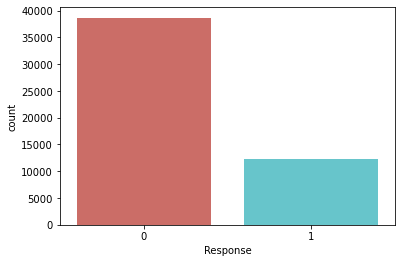

0    38673
1    12209
Name: Response, dtype: int64


In [11]:
sns.countplot(x='Response',data=df,palette='hls')
plt.show()
print(df['Response'].value_counts())

In [ ]:
#In the above graph it is clear that the data is not balanced count value '1' is less than the count value '0'

In [14]:
#since the data is not balanced applying sampling to upsample the data
df_majority = df[df.Response==0]
df_minority = df[df.Response==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=38670,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Response.value_counts()

0    38673
1    38670
Name: Response, dtype: int64

In [15]:
df1=df.drop(['Response'],axis=1,inplace=True)
df1=pd.concat([df1,df_upsampled])

In [16]:
df1.head()

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3213,0,0,36,36,0,1,15.0,3.0,22,11628.0,0
1,2,1117,1,1,75,22,0,2,15.0,3.0,22,30510.0,0
3,4,4378,1,1,52,48,0,1,15.0,3.0,19,17780.0,0
4,5,2190,0,0,44,44,0,2,3.0,1.0,16,10404.0,0
6,7,679,1,0,28,28,0,2,5.0,1.0,17,10640.0,0


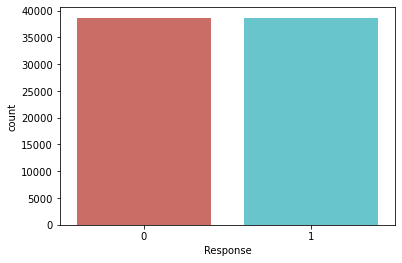

0    38673
1    38670
Name: Response, dtype: int64


In [17]:
#visualizing the result of sampled data
#now the data is balanced 
sns.countplot(x='Response',data=df1,palette='hls')
plt.show()
print(df1['Response'].value_counts())

# Training

In [18]:
#splitting train dataset into training and testing sets into 8:2
#80% for training and 20% for testing
Y=df1['Response']
X=df1.drop(['Response'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
#base model
#Logistic Regression didn't provide much accuracy
model = LogisticRegression()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

yp = model.predict(X_test)
cm = confusion_matrix(yp, Y_test)
cm

0.5431508177645614


array([[3199, 2534],
       [4533, 5203]], dtype=int64)

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6960372357618463


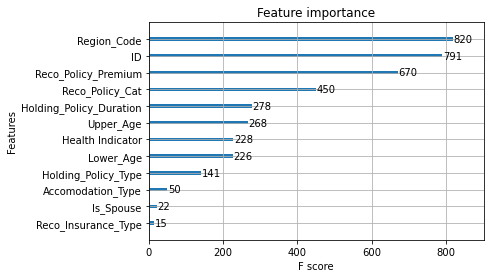

array([[4837, 1807],
       [2895, 5930]], dtype=int64)

In [25]:
#apply Xgboost for training and displayin the features useful for predicting the target variable
model1 = XGBClassifier()
model1.fit(X_train, Y_train)

print(model1.score(X_test, Y_test))

yp = model1.predict(X_test)
cm = confusion_matrix(yp, Y_test)
plot_importance(model1) #plotting graph that displays the importance of features for predicting the target variable
plt.show()
cm

In [79]:
#apply Random Forest for improving accuracy
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
print(rf.score(X_test, Y_test))
yp = rf.predict(X_test)
cm = confusion_matrix(yp, Y_test)
cm

0.9345141896696619


array([[7246,  527],
       [ 486, 7210]], dtype=int64)

In [ ]:
#after training with Random Forest model get the accuracy of 93.45% 

0.9689974592161703
0.5


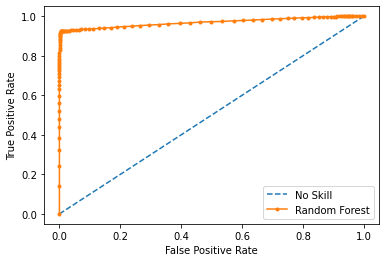

In [90]:
#calculate roc_auc score
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs)
roc_value = roc_auc_score(Y_test, rf_probs)
print(roc_value)
print(ns_auc)

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, rf_probs)
# plot roc curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# prediction on test data

In [54]:
df_test=pd.read_csv('test.csv') #import test data
df_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [69]:
#displaying unique values of categorical attributes
print(df_test['Health Indicator'].unique())
print(df_test['Holding_Policy_Duration'].unique())
print(df_test['Holding_Policy_Type'].unique())
print(df_test['Accomodation_Type'].unique())
print(df_test['Reco_Insurance_Type'].unique())
print(df_test['Is_Spouse'].unique())

['X1' 'X3' 'X2' 'X5' 'X4' 'X7' 'X6' 'X9' 'X8']
['6.0' '3.0' '2.0' '14+' '5.0' '1.0' '4.0' '12.0' '11.0' '7.0' '9.0'
 '13.0' '8.0' '14.0' '10.0']
[3. 4. 1. 2.]
[1 0]
[0 1]
[0 1]


In [59]:
df_test.drop(['City_Code'],axis=1,inplace=True)

In [70]:
#diplaying value counts
print(df_test['Health Indicator'].value_counts())
print(df_test['Holding_Policy_Duration'].value_counts())
print(df_test['Holding_Policy_Type'].value_counts())

X1    7340
X2    5811
X3    3756
X4    3143
X5     895
X6     665
X7     110
X8      53
X9      32
Name: Health Indicator, dtype: int64
1.0     3207
14+     3084
2.0     2969
3.0     2640
4.0     2018
5.0     1617
6.0     1455
7.0     1169
8.0      917
9.0      781
10.0     541
11.0     400
13.0     356
12.0     329
14.0     322
Name: Holding_Policy_Duration, dtype: int64
3.0    9194
1.0    5898
2.0    3539
4.0    3174
Name: Holding_Policy_Type, dtype: int64


# handling nan values and label encoding

In [67]:
df_test['Health Indicator'].fillna(method='bfill',inplace=True)
df_test['Holding_Policy_Duration'].fillna(method='ffill',inplace=True)
df_test['Holding_Policy_Type'].fillna(method='ffill',inplace=True)

In [72]:
df_test["Accomodation_Type"].replace({"Rented": 0, "Owned": 1}, inplace=True)
df_test["Is_Spouse"].replace({"No": 0, "Yes": 1}, inplace=True)
df_test["Reco_Insurance_Type"].replace({"Individual": 0, "Joint": 1}, inplace=True)
df_test['Health Indicator'] = df_test['Health Indicator'].map(lambda x: x.lstrip('X'))
#df['Health Indicator'] = df['Health Indicator'].astype(str).str.lstrip('X')
df_test["Holding_Policy_Duration"].replace({"14+": 15}, inplace=True)

In [75]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  int64  
 3   Reco_Insurance_Type      21805 non-null  int64  
 4   Upper_Age                21805 non-null  int64  
 5   Lower_Age                21805 non-null  int64  
 6   Is_Spouse                21805 non-null  int64  
 7   Health Indicator         21805 non-null  int64  
 8   Holding_Policy_Duration  21805 non-null  float64
 9   Holding_Policy_Type      21805 non-null  float64
 10  Reco_Policy_Cat          21805 non-null  int64  
 11  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 2.0 MB


,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,156,1,0,30,30,0,1,6.0,3.0,5,11934.0
1,50884,7,1,1,69,68,1,1,3.0,3.0,18,32204.8
2,50885,564,0,0,28,28,0,3,2.0,4.0,17,9240.0
3,50886,1177,0,0,23,23,0,3,3.0,3.0,18,9086.0
4,50887,951,1,0,75,75,0,3,3.0,3.0,5,22534.0


In [74]:
df_test[["Health Indicator", "Holding_Policy_Duration"]] = df_test[["Health Indicator", "Holding_Policy_Duration"]].apply(pd.to_numeric)

In [78]:
#prediction of results in test data
#storing result in submission.csv file
yp = rf.predict(df_test)
ID=df_test['ID']
prediction=pd.DataFrame(yp,ID,columns=["Response"])
prediction.to_csv("submission.csv",index_label=["ID"])

In [86]:
#diaplay submission.csv file 
sub=pd.read_csv('submission.csv')
sub.head()

,ID,Response
0,50883,0
1,50884,1
2,50885,0
3,50886,0
4,50887,0
